In [26]:
import math
import nltk
import spacy
import re
import warnings
import scipy.stats as stats

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib.mlab import PCA as mlabPCA
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.utils import resample
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
import textwrap

from datetime import datetime
from dateutil.parser import parse
from nltk.stem.porter import PorterStemmer
from nltk.corpus import gutenberg, stopwords

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [5]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [6]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


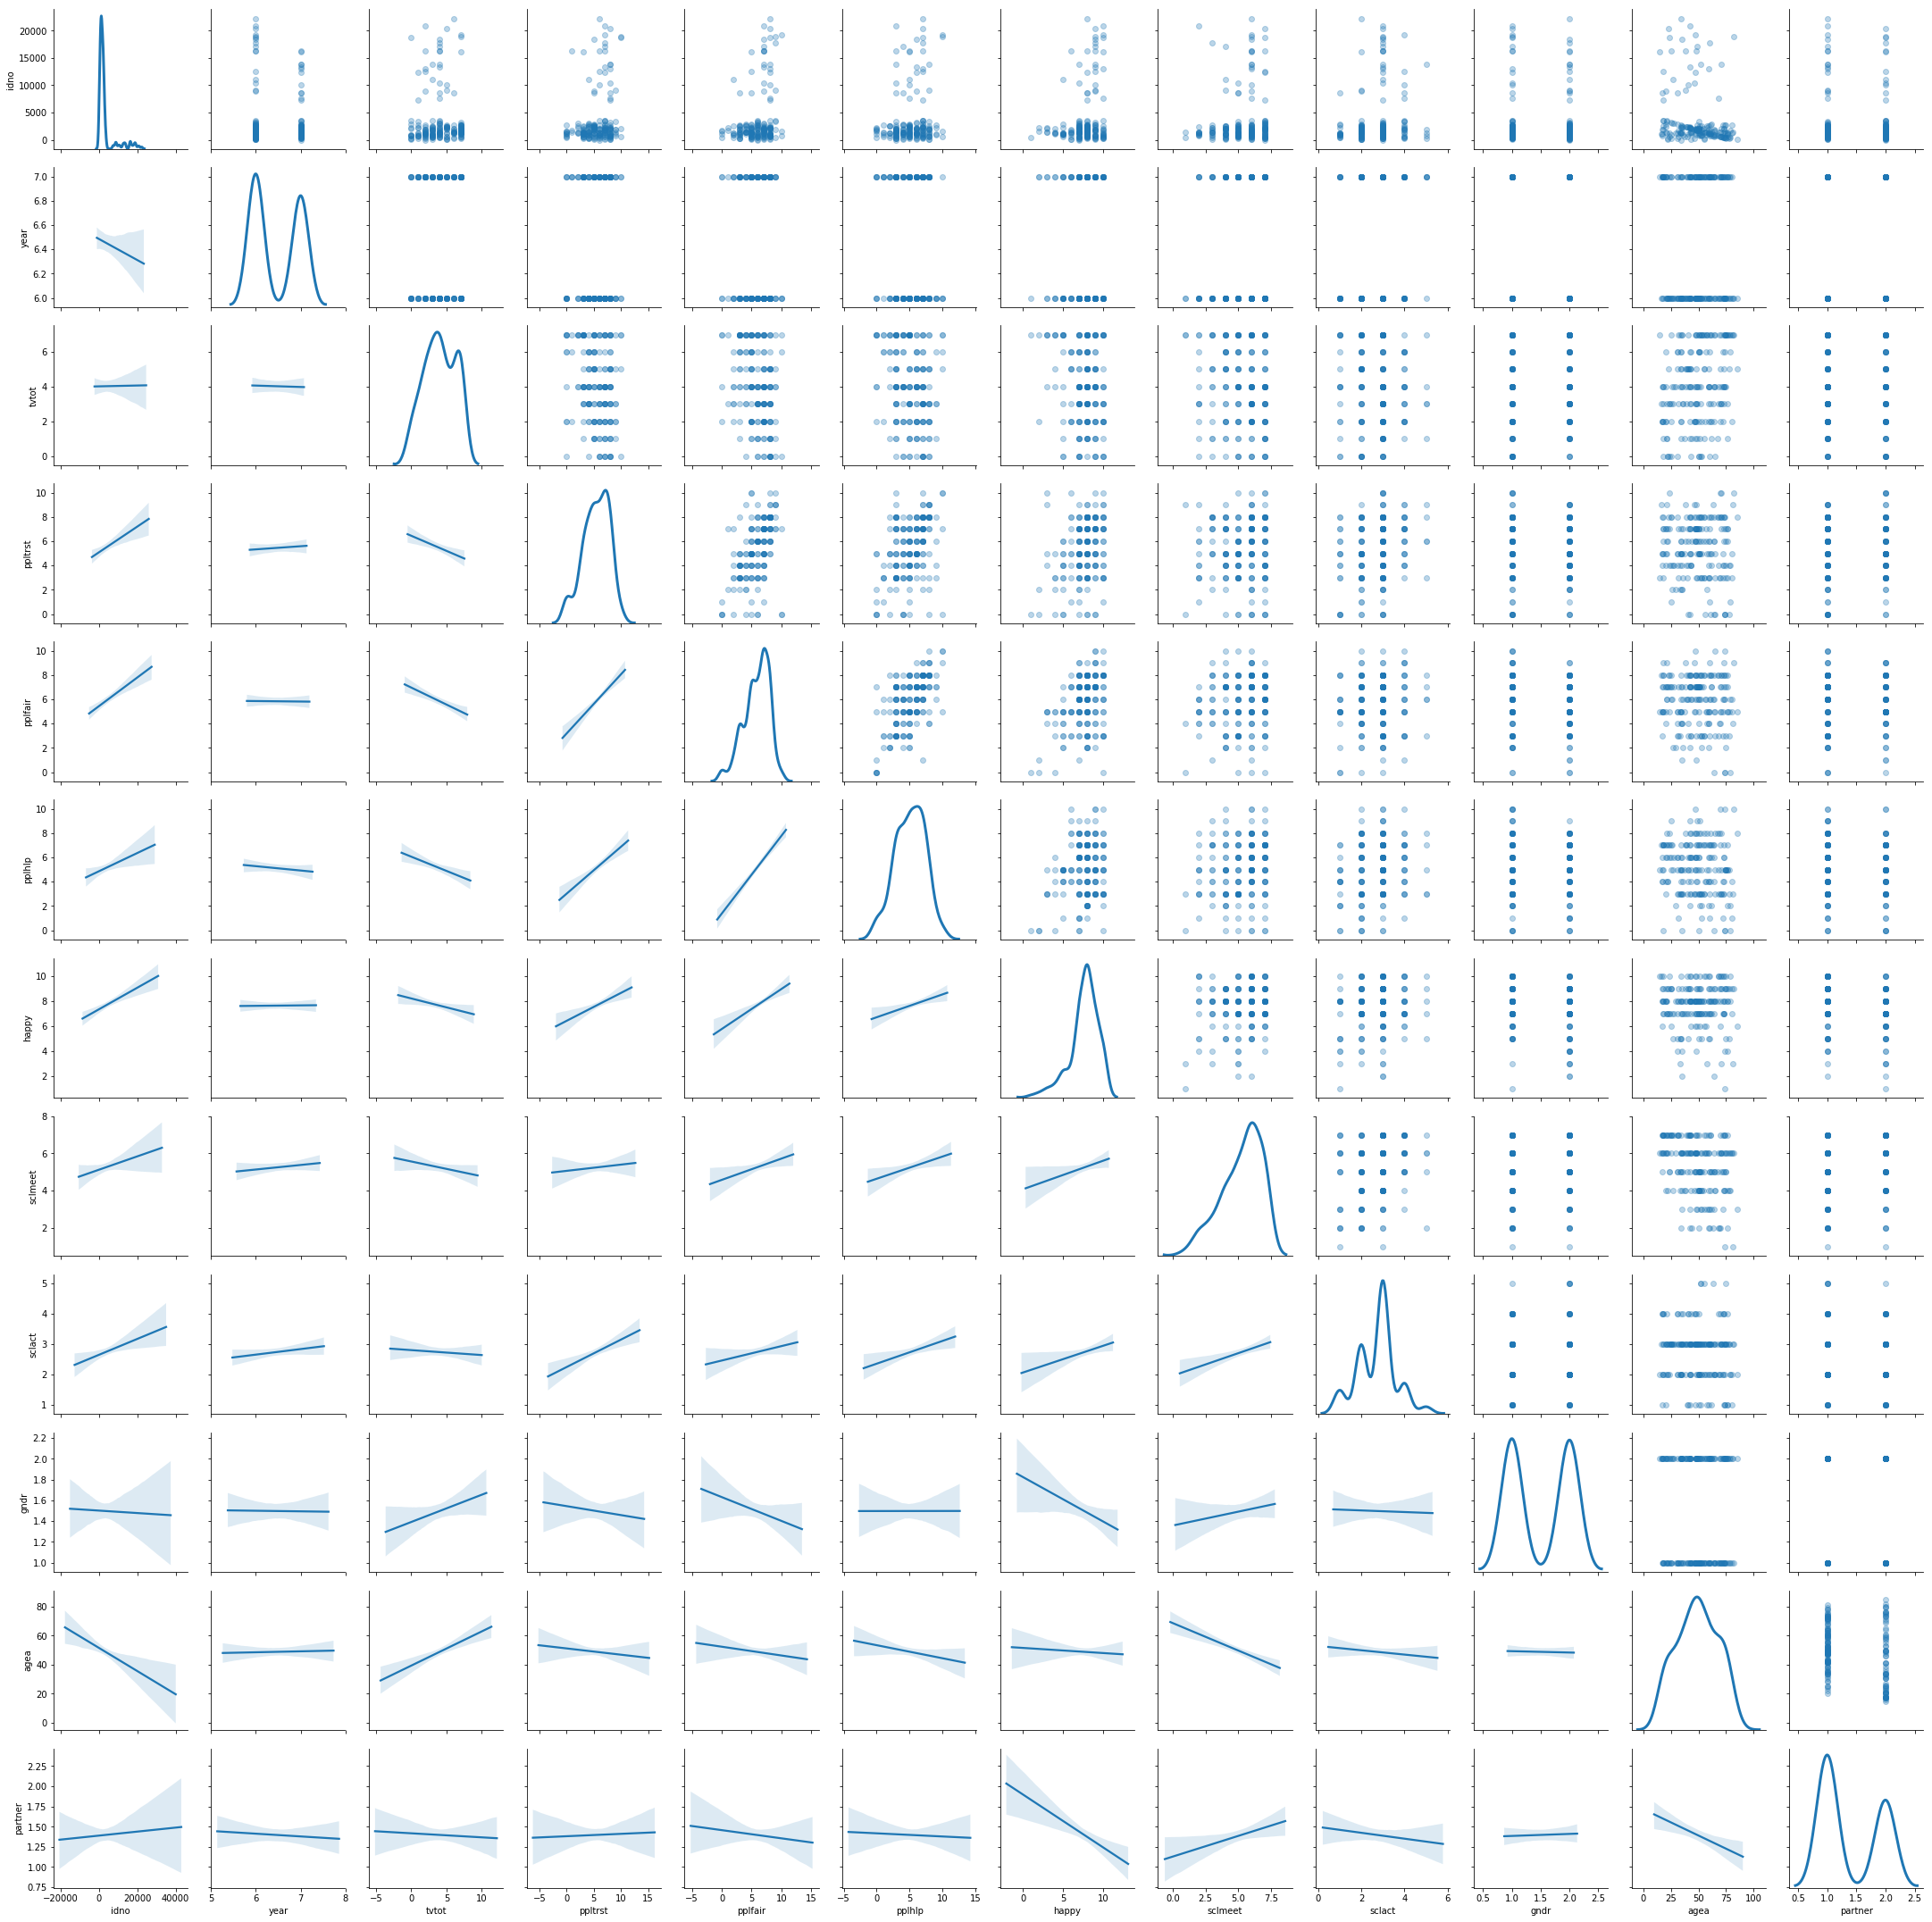

CPU times: user 46.7 s, sys: 4.74 s, total: 51.5 s
Wall time: 24.4 s


In [7]:
%%time

### Creating Scatterplot Matrix with Sample of DataFrame

## Store samples of DataFrame For Visualization

df_sample = df.sample(100)

## Declare Pairgrid
g = sns.PairGrid(df_sample.dropna(), diag_sharey=False)

## Scatterplot
g.map_upper(plt.scatter, alpha=.3)

## Fit line 
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

## KDE plot
g.map_diag(sns.kdeplot, lw=3)
plt.show()

### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

For the Country of Spain, people actually did become less trusting. 

For the country of Sweden people actually became more trusting. For all other countries, there was no statistically significant difference in people's trust.

In [23]:
df.cntry.value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

In [25]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [56]:
for country in df.cntry.unique():
    print(country + ': ' + str(stats.ttest_ind(df.loc[(df['cntry'] == country) & (df['year'] == 6)].dropna()['ppltrst'], df.loc[(df['cntry'] == country) & (df['year'] == 7)].dropna()['ppltrst'])) + '\n')

CH: Ttest_indResult(statistic=-0.7156974792217816, pvalue=0.4742916002909491)

CZ: Ttest_indResult(statistic=0.34075433231518504, pvalue=0.7333479315909976)

DE: Ttest_indResult(statistic=-0.3466213170125284, pvalue=0.7317764273785732)

ES: Ttest_indResult(statistic=2.1000674443244907, pvalue=0.03583204193521363)

NO: Ttest_indResult(statistic=0.5119224181145228, pvalue=0.6087850218131978)

SE: Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.0428293634522298)



In [62]:
df.loc[(df['cntry'] == 'SE') & (df['year'] == 6)]['ppltrst'].mean()

6.058498896247241

In [63]:
df.loc[(df['cntry'] == 'SE') & (df['year'] == 7)]['ppltrst'].mean()

6.257709251101321

In [64]:
df.loc[(df['cntry'] == 'ES') & (df['year'] == 6)]['ppltrst'].mean()

5.114591920857379

In [66]:
df.loc[(df['cntry'] == 'ES') & (df['year'] == 7)]['ppltrst'].mean()

4.895127993393889

### Did people become happier from 2012 to 2014? Compute results for each country in the sample.

People did not significantly become happier between 2012 and 2014 in each given country.

Happiness actually decreased in the country of Norway.

In [67]:
for country in df.cntry.unique():
    print(country + ': ' + str(stats.ttest_ind(df.loc[(df['cntry'] == country) & (df['year'] == 6)].dropna()['happy'], df.loc[(df['cntry'] == country) & (df['year'] == 7)].dropna()['happy'])) + '\n')

CH: Ttest_indResult(statistic=-0.812142488327401, pvalue=0.4168411011770018)

CZ: Ttest_indResult(statistic=-1.1592536826704618, pvalue=0.24658245820500238)

DE: Ttest_indResult(statistic=-0.966317541228559, pvalue=0.3431409128727073)

ES: Ttest_indResult(statistic=1.3750588408504656, pvalue=0.16924771370417369)

NO: Ttest_indResult(statistic=4.152957205997266, pvalue=3.4778681704487346e-05)

SE: Ttest_indResult(statistic=-0.5372790210326394, pvalue=0.5911442306272388)



In [68]:
df.loc[(df['cntry'] == 'NO') & (df['year'] == 6)]['happy'].mean()

8.25171939477304

In [69]:
df.loc[(df['cntry'] == 'NO') & (df['year'] == 7)]['happy'].mean()

7.9151846785225715

### Who reported watching more TV in 2012, men or women?

Neither group across all countries watched a statistically significantly larger amount of tv than the other.

In [71]:
stats.ttest_ind(df.loc[(df['gndr'] == 1)].dropna()['tvtot'], df.loc[(df['gndr'] == 2)].dropna()['tvtot'])

Ttest_indResult(statistic=-1.6176926106407103, pvalue=0.10576758143732026)

In [72]:
df.loc[(df['gndr'] == 1)].dropna()['tvtot'].describe()

count    4103.000000
mean        3.782842
std         1.994478
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: tvtot, dtype: float64

In [73]:
df.loc[(df['gndr'] == 2)].dropna()['tvtot'].describe()

count    4044.000000
mean        3.854847
std         2.023104
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: tvtot, dtype: float64

### Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

People living with a partner were statistically more likely to believe that people were fair in 2012.

In [74]:
stats.ttest_ind(df.loc[(df['partner'] == 1) & (df['year'] == 6)].dropna()['pplfair'], df.loc[(df['partner'] == 2) & (df['year'] == 6)].dropna()['pplfair'])

Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)

In [76]:
df.loc[(df['partner'] == 1) & (df['year'] == 6)].dropna()['pplfair'].describe()

count    2542.000000
mean        6.074351
std         2.102916
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: pplfair, dtype: float64

In [77]:
df.loc[(df['partner'] == 2) & (df['year'] == 6)].dropna()['pplfair'].describe()

count    1529.000000
mean        5.865925
std         2.138453
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: pplfair, dtype: float64

### Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

There are Significant differences in how often people of different countries met socially. The significant difference existed between the people of Spain and Sweden, and the people of Sweden and Norway, respectively.

In [78]:
F, p = stats.f_oneway(
    df.loc[(df['cntry'] == 'ES') & (df['year'] == 7)].dropna()['sclmeet'],
    df.loc[(df['cntry'] == 'SE') & (df['year'] == 7)].dropna()['sclmeet'],
    df.loc[(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()['sclmeet'])



In [79]:

print(F)

print(p)

3.8146762114057697
0.02216331981881286


In [80]:
print(stats.ttest_ind(df.loc[(df['cntry'] == 'ES') & (df['year'] == 7)].dropna()['sclmeet'],
    df.loc[(df['cntry'] == 'SE') & (df['year'] == 7)].dropna()['sclmeet']))
print(stats.ttest_ind(df.loc[(df['cntry'] == 'SE') & (df['year'] == 7)].dropna()['sclmeet'],
    df.loc[(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()['sclmeet']))
print(stats.ttest_ind(df.loc[(df['cntry'] == 'ES') & (df['year'] == 7)].dropna()['sclmeet'],
    df.loc[(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()['sclmeet']))

Ttest_indResult(statistic=-2.6925202988475645, pvalue=0.0071506085242787525)
Ttest_indResult(statistic=1.8108243825311887, pvalue=0.07035826286442122)
Ttest_indResult(statistic=-0.6968046493592841, pvalue=0.48601288469157433)


### Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

There were significant differences found among the older members of each Country, namely: between Spain and Sweden; and between Sweden and Norway.

In [87]:
F, p = stats.kruskal(
    df.loc[(df['cntry'] == 'ES') & (df['year'] == 7) & (df['agea'] <= 45)].dropna()['sclact'],
    df.loc[(df['cntry'] == 'SE') & (df['year'] == 7) & (df['agea'] <= 45)].dropna()['sclact'],
    df.loc[(df['cntry'] == 'NO') & (df['year'] == 7) & (df['agea'] <= 45)].dropna()['sclact'])

In [88]:
print(F)

print(p)

14.872417258719159
0.000589516039703983


In [89]:
print(stats.kruskal(df.loc[(df['cntry'] == 'ES') & (df['year'] == 7) & (df['agea'] <= 45)].dropna()['sclact'],
    df.loc[(df['cntry'] == 'SE') & (df['year'] == 7) & (df['agea'] <= 45)].dropna()['sclact']))
print(stats.ttest_ind(df.loc[(df['cntry'] == 'SE') & (df['year'] == 7) & (df['agea'] <= 45)].dropna()['sclact'],
    df.loc[(df['cntry'] == 'NO') & (df['year'] == 7) & (df['agea'] <= 45)].dropna()['sclact']))
print(stats.ttest_ind(df.loc[(df['cntry'] == 'ES') & (df['year'] == 7) & (df['agea'] <= 45)].dropna()['sclact'],
    df.loc[(df['cntry'] == 'NO') & (df['year'] == 7) & (df['agea'] <= 45)].dropna()['sclact']))

KruskalResult(statistic=12.9253491833071, pvalue=0.00032416217971409204)
Ttest_indResult(statistic=0.45465763775503054, pvalue=0.6494967218097354)
Ttest_indResult(statistic=-3.1486968857067024, pvalue=0.0016961433884733822)
